<a href="https://colab.research.google.com/github/young-hwanlee/CNN_PMU/blob/main/test_clustering_pmu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/young-hwanlee/CNN_PMU.git

Cloning into 'CNN_PMU'...
fatal: could not read Username for 'https://github.com': No such device or address


In [2]:
ls -ltr

total 4
drwxr-xr-x 1 root root 4096 Sep  1 19:26 sample_data/


In [3]:
#%%
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
/
## Import libraries and modules
import sys
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras import utils
from keras.datasets import mnist
from keras.callbacks import ReduceLROnPlateau

## Set up the seed for reproducibility.
seed=42

tf.compat.v1.reset_default_graph()
tf.compat.v1.set_random_seed(seed)
np.random.seed(seed)

print('Python version : ', sys.version)
print('TensorFlow version : ', tf.__version__)
print('Keras version : ', keras.__version__)

Python version :  3.7.11 (default, Jul  3 2021, 18:01:19) 
[GCC 7.5.0]
TensorFlow version :  2.6.0
Keras version :  2.6.0


In [4]:
from google.colab import files
file_uploaded = files.upload()

Saving pmu_case1.mat to pmu_case1.mat


In [5]:
import scipy.io
mat_file_name = "pmu_case1.mat"
mat_file = scipy.io.loadmat(mat_file_name)

In [6]:
print(mat_file)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Apr 07 13:32:47 2015', '__version__': '1.0', '__globals__': [], 'Z1': array([[            nan,  1.00000000e+00,  2.00000000e+00, ...,
         1.08000000e+02,  1.09000000e+02,  1.10000000e+02],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [-1.66660007e-02,  6.34659500e+01,  4.21432724e+01, ...,
         4.41953853e-06,  1.02176714e+00, -4.08036900e+00],
       ...,
       [ 9.99744720e+01,  4.70117615e+02,  4.48710297e+02, ...,
         4.06633331e+02,  1.02176929e+00,  4.02553528e+02],
       [ 9.99994659e+01,  4.70105469e+02,  4.48698303e+02, ...,
         4.06621277e+02,  1.02176940e+00,  4.02541473e+02],
       [ 1.00007797e+02,  4.70101440e+02,  4.48694336e+02, ...,
         4.06617249e+02,  1.02176940e+00,  4.02537445e+02]])}


In [7]:
type(mat_file)

dict

In [8]:
mat_file.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Z1'])

In [9]:
mat_file['Z1']

array([[            nan,  1.00000000e+00,  2.00000000e+00, ...,
         1.08000000e+02,  1.09000000e+02,  1.10000000e+02],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [-1.66660007e-02,  6.34659500e+01,  4.21432724e+01, ...,
         4.41953853e-06,  1.02176714e+00, -4.08036900e+00],
       ...,
       [ 9.99744720e+01,  4.70117615e+02,  4.48710297e+02, ...,
         4.06633331e+02,  1.02176929e+00,  4.02553528e+02],
       [ 9.99994659e+01,  4.70105469e+02,  4.48698303e+02, ...,
         4.06621277e+02,  1.02176940e+00,  4.02541473e+02],
       [ 1.00007797e+02,  4.70101440e+02,  4.48694336e+02, ...,
         4.06617249e+02,  1.02176940e+00,  4.02537445e+02]])

In [10]:
len(mat_file['Z1'])

4008

In [11]:
np.size(mat_file['Z1'])

444888

In [12]:
a = [1,2,3,4,5,6,7]
a[-1]
a[1:-1]
a[1:]

[2, 3, 4, 5, 6, 7]

In [13]:
X_mag_MATLAB_list = [66,68,70,72,74,76,78,80,82,84,86,88,90,92,94,96,98,100,102,104,106,108,110]
len(X_mag_MATLAB_list)

23

In [14]:
[1]*(len(X_mag_MATLAB_list))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [15]:
temp_list = [1]*(len(X_mag_MATLAB_list))
X_mag_Python_list = [i - j for (i,j) in zip(X_mag_MATLAB_list,temp_list)]
X_mag_Python_list

[65,
 67,
 69,
 71,
 73,
 75,
 77,
 79,
 81,
 83,
 85,
 87,
 89,
 91,
 93,
 95,
 97,
 99,
 101,
 103,
 105,
 107,
 109]

In [16]:
X_clean_tmp = mat_file['Z1'][2:,X_mag_Python_list].tolist()
# [N,T] = np.size(X_clean_tmp)
# np.size(X_clean_tmp)
# len(X_clean_tmp)
type(X_clean_tmp)
[T,N] = [len(X_clean_tmp), len(X_clean_tmp[1])]
print(N,T)

23 4006


In [17]:
t1 = 0.016666000708938
t2 = 1.000077972412109e+02
t = np.linspace(t1,t2,T)
len(t)

4006

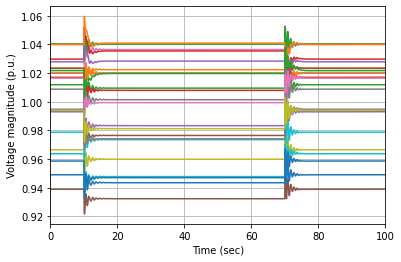

In [18]:
# Plots the data (close to 1p.u.)
plt.figure()
plt.plot(t,X_clean_tmp)
plt.xlabel('Time (sec)')
plt.ylabel('Voltage magnitude (p.u.)')
plt.xlim(0,t2)
plt.grid(True)
plt.show()

In [19]:
X_clean_tmp - np.ones((T,N))

array([[ 0.01999891,  0.01999891,  0.01189625, ..., -0.04138786,
         0.03999925,  0.02176714],
       [ 0.01999891,  0.01999891,  0.01189625, ..., -0.04138786,
         0.03999925,  0.02176714],
       [ 0.01999891,  0.01999891,  0.01189625, ..., -0.04138786,
         0.03999925,  0.02176714],
       ...,
       [ 0.01999831,  0.01999831,  0.01189983, ..., -0.04136711,
         0.03999901,  0.02176929],
       [ 0.01999843,  0.01999843,  0.01189995, ..., -0.04136711,
         0.03999901,  0.0217694 ],
       [ 0.01999867,  0.01999867,  0.01190007, ..., -0.04136699,
         0.03999913,  0.0217694 ]])

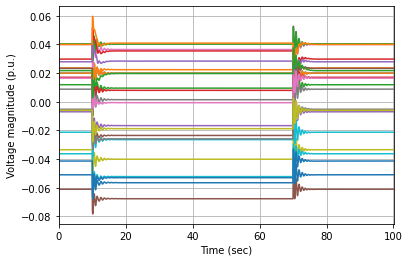

In [20]:
mu_X = np.ones((T,N))
X_clean = X_clean_tmp - mu_X

# Plots the data (move to near 0p.u.)
plt.figure()
plt.plot(t,X_clean)
plt.xlabel('Time (sec)')
plt.ylabel('Voltage magnitude (p.u.)')
plt.xlim(0,t2)
plt.grid(True)
plt.show()

In [21]:
np.shape(X_clean)

(4006, 23)

In [22]:
(T,N)

(4006, 23)

In [23]:
# author - Mathuranathan Viswanathan (gaussianwaves.com
# This code is part of the book Digital Modulations using Python

from numpy import sum,isrealobj,sqrt
from numpy.random import standard_normal

def awgn(s,SNRdB,L=1):
    """
    AWGN channel
    Add AWGN noise to input signal. The function adds AWGN noise vector
    to signal 's' to generate a resulting signal vector 'r' of specified SNR
    in dB. It also returns the noise vector 'n' that is added to the signal 's'
    and the power spectral density N0 of noise added
    
    Parameters:
        s : input/transmitted signal vector
        SNRdB : desired signal to noise ratio (expressed in dB) for the received signal
        L : oversampling factor (applicable for waveform simulation) default L = 1.
    Returns:
        r : received signal vector (r=s+n)
    """
    gamma = 10**(SNRdB/10)  # SNR to linear scale
    if s.ndim == 1:   # if s is single dimensional vector
        P = L*sum(abs(s)**2)/len(s) # Actual power in the vector
    else:   # multi-dimensional signals like MFSK
        P = L*sum(sum(abs(s)**2))/len(s)  # if s is a matrix [MxN]
    N0 = P/gamma  # Find the noise spectral density
    if isrealobj(s):    # check if input is real/complex object type
        n = sqrt(N0/2)*standard_normal(s.shape) # computed noise
    else:
        n = sqrt(N0/2)*(standard_normal(s.shape) + 1j*standard_normal(s.shape))
    r = s + n # received signal
    return r

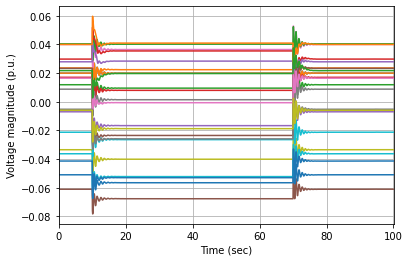

In [24]:
# Add a SNR of 92 dB
X = awgn(X_clean, 92)

# Plots the data after adding noises
plt.figure()
plt.plot(t,X)
plt.xlabel('Time (sec)')
plt.ylabel('Voltage magnitude (p.u.)')
plt.xlim(0,t2)
plt.grid(True)
plt.show()

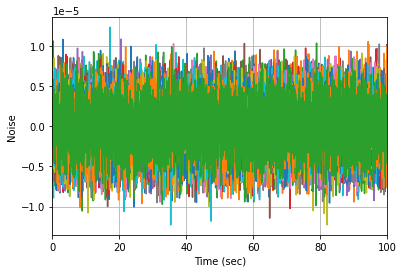

In [25]:
# Plot the noise
plt.figure()
plt.plot(t,X - X_clean)
plt.xlabel('Time (sec)')
plt.ylabel('Noise')
plt.xlim(0,t2)
plt.grid(True)
plt.show()

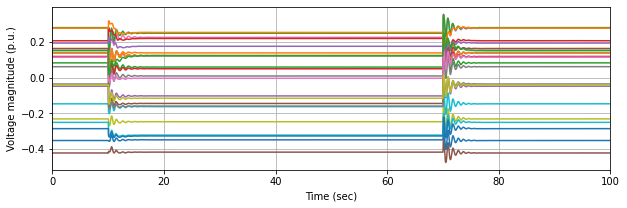

In [26]:
# Plots the data after normalizing
X_norm_vec = np.linalg.norm(X_clean, axis=1)
X_norm = X / X_norm_vec[:,None]

plt.figure(figsize=(10,3))
plt.plot(t,X_norm)
plt.xlabel('Time (sec)')
plt.ylabel('Voltage magnitude (p.u.)')
plt.xlim(0,t2)
plt.grid(True)
plt.show()

In [27]:
len(X_norm[0])

23

In [28]:
from sklearn.cluster import KMeans

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='random', n_init=100,
                max_iter=1e3, tol=1e-5).fit(X_norm)

# plt.figure()
# plt.plot(X_norm[np.where(kmeans.labels_==0)])
# plt.xlabel('Time (sec)')
# plt.ylabel('Voltage magnitude (p.u.)')
# plt.grid(True)
# plt.show()

<Figure size 432x288 with 0 Axes>

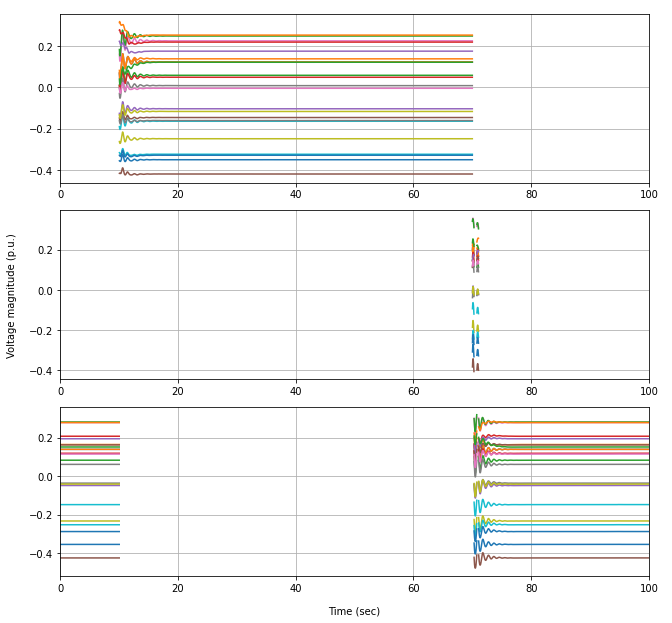

In [29]:
plt.figure()
fig, ax = plt.subplots(nrows=n_clusters, ncols=1,
                       sharex=True, sharey=True, figsize=(10,9))
for i in range(n_clusters):
    plt.subplot(n_clusters,1,i+1)
    X_tmp = np.empty((T,N))*np.nan
    X_tmp[np.where(kmeans.labels_==i)] = X_norm[np.where(kmeans.labels_==i)]
    plt.plot(t,X_tmp)
    plt.xlim(0,t2)
    plt.grid(True)

fig.add_subplot(111,frameon=False)
plt.tick_params(axis='both',labelsize=20,labelcolor='none', which='both',
                top=False, bottom=False, left=False, right=False)
plt.xlabel('Time (sec)')
plt.ylabel('Voltage magnitude (p.u.)')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

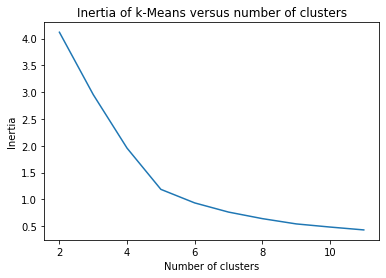

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# inertia_ : Sum of squared distances of samples to their closest cluster center.
scores = [KMeans(n_clusters=i+2).fit(X_norm).inertia_ for i in range(10)]
sns.lineplot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

## Since k-Means typically uses Euclidean distance to calculate the distances, **it does not work well with high dimensional data sets due to the curse of dimensionality.** This curse, in part, states that Euclidean distances at high dimensionality have very little meaning since they are often very close together.

In [31]:
from sklearn.cluster import SpectralClustering

n_clusters = 3
clustering = SpectralClustering(
    n_clusters=n_clusters, assign_labels='discretize', random_state=0).fit(X_norm)

<Figure size 432x288 with 0 Axes>

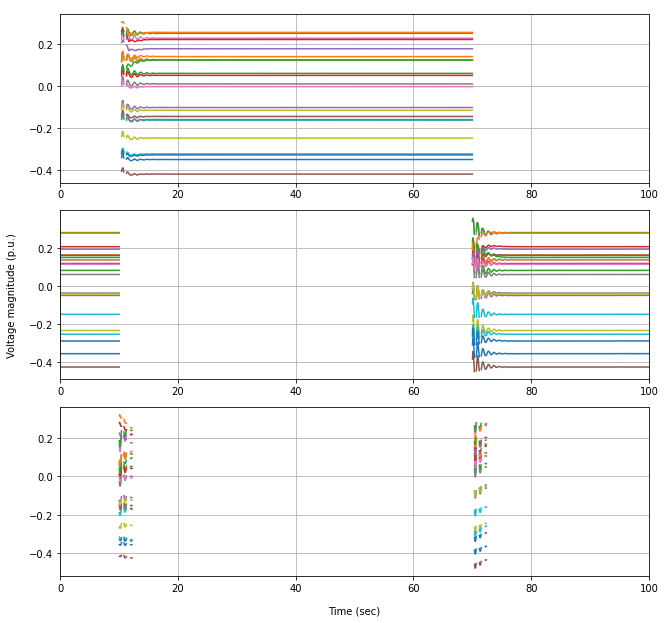

In [32]:
plt.figure()
fig, ax = plt.subplots(nrows=n_clusters, ncols=1,
                       sharex=True, sharey=True, figsize=(10,9))
for i in range(n_clusters):
    plt.subplot(n_clusters,1,i+1)
    X_tmp = np.empty((T,N))*np.nan
    X_tmp[np.where(clustering.labels_==i)] = X_norm[np.where(clustering.labels_==i)]
    plt.plot(t,X_tmp)
    plt.xlim(0,t2)
    plt.grid(True)

fig.add_subplot(111,frameon=False)
plt.tick_params(axis='both',labelsize=20,labelcolor='none', which='both',
                top=False, bottom=False, left=False, right=False)
plt.xlabel('Time (sec)')
plt.ylabel('Voltage magnitude (p.u.)')
plt.tight_layout()
plt.show()

In [33]:
from sklearn.cluster import DBSCAN

# dbscan = DBSCAN(eps=0.123, min_samples = 2).fit(X_norm)
dbscan = DBSCAN(eps=0.01, min_samples=23).fit(X_norm)

min(dbscan.labels_), max(dbscan.labels_)

(-1, 1)

## You typically do not want **min_samples** to be very small, as clusters from noise will be generated. As a rule of thumb, it is best to set **min_samples** to at least the number of features in your data.

<Figure size 432x288 with 0 Axes>

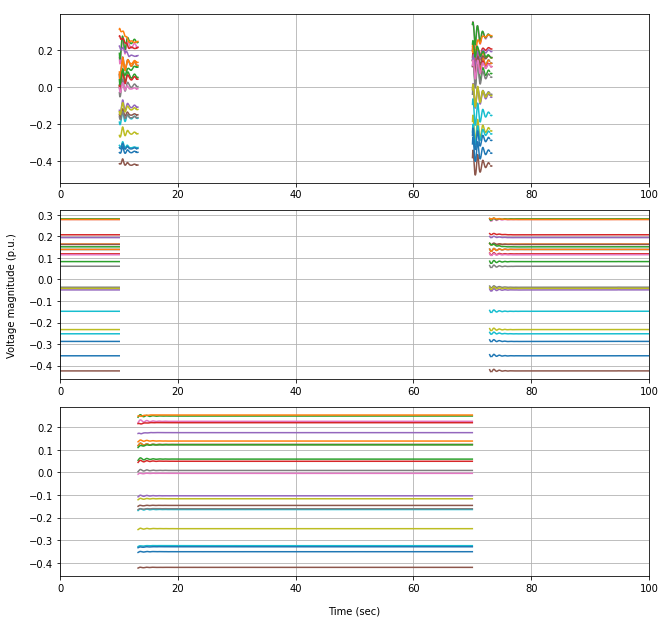

In [34]:
dbscan_n_clusers = max(dbscan.labels_) - min(dbscan.labels_) + 1

plt.figure()
fig, ax = plt.subplots(nrows=n_clusters, ncols=1,
                       sharex=True, sharey=True, figsize=(10,9))
for i in range(-1,max(dbscan.labels_)+1):
    plt.subplot(dbscan_n_clusers,1,i+2)
    X_tmp = np.empty((T,N))*np.nan
    X_tmp[np.where(dbscan.labels_==i)] = X_norm[np.where(dbscan.labels_==i)]
    plt.plot(t,X_tmp)
    plt.xlim(0,t2)
    plt.grid(True)

fig.add_subplot(111,frameon=False)
plt.tick_params(axis='both',labelsize=20,labelcolor='none', which='both',
                top=False, bottom=False, left=False, right=False)
plt.xlabel('Time (sec)')
plt.ylabel('Voltage magnitude (p.u.)')
plt.tight_layout()
plt.show()